In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import ipywidgets as widgets
from time import sleep
%matplotlib inline

In [21]:
df=pd.read_csv("ngc1558.csv")

In [22]:
df

,Distance modulus,Distance modulus error,Distance (Mpc),Distance error (Mpc),Method,Year,Unnamed: 6
0,34.12,0.32,67,10,Tully-Fisher,1992,NaN
1,34.20,0.32,69,10,Tully-Fisher,1992,NaN
2,33.92,0.43,61,12,Tully-Fisher,1997,NaN
3,34.15,0.43,68,13,Tully-Fisher,1997,NaN
4,34.25,0.43,71,14,Tully-Fisher,1997,NaN
5,33.88,0.80,60,22,IRAS,1997,NaN
6,33.99,0.07,63,2,Sosies,2002,NaN
7,33.86,0.46,59,13,Tully-Fisher,2007,NaN
8,33.88,0.47,60,13,Tully-Fisher,2007,NaN
9,33.98,0.40,63,12,Tully-Fisher,2007,NaN


In [37]:
stats.norm.pdf(mu,i,j).max()

1.9945948408313647

(0, 2.2)

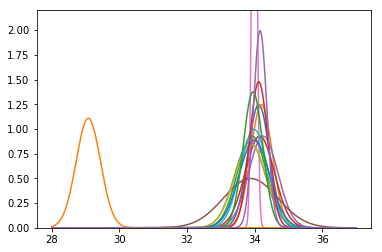

In [56]:
minm=28
maxm=37
mu=np.linspace(minm,maxm,1000)
for i,j in zip(df['Distance modulus'],df['Distance modulus error']):
    plt.plot(mu,stats.norm.pdf(mu,i,j))
plt.ylim(0,2.2)

In [82]:
def myplot0(k):
    i=df['Distance modulus'].iloc[k]
    j=df['Distance modulus error'].iloc[k]
    plt.plot(mu,stats.norm.pdf(mu,i,j))
    if j > 0.1:
        plt.text(i-1.5,stats.norm.pdf(mu,i,j).max()+0.1,r'$\mu=$'+str(i)+r'; $\sigma=$'+str(j))
    if j < 0.1:
        plt.text(i-1.8,1,r'$\mu=$'+str(i)+r';      $\sigma=$'+str(j))
#    plt.axvline(np.random.normal(i,j),c='r')
    plt.xlabel(r"$\mu$")
    plt.ylabel(r"$P(\mu)$")
    plt.ylim(0,2.2)
    plt.xlim(minm,maxm)
    plt.show()
    sleep(1)

In [85]:
def myplot(k):
    i=df['Distance modulus'].iloc[k]
    j=df['Distance modulus error'].iloc[k]
    plt.plot(mu,stats.norm.pdf(mu,i,j))
    if j > 0.1:
        plt.text(i-1.5,stats.norm.pdf(mu,i,j).max()+0.1,r'$\mu=$'+str(i)+r'; $\sigma=$'+str(j))
    if j < 0.1:
        plt.text(i-1.8,1,r'$\mu=$'+str(i)+r';      $\sigma=$'+str(j))
    plt.axvline(np.random.normal(i,j),c='r')
    plt.xlabel(r"$\mu$")
    plt.ylabel(r"$P(\mu)$")
    plt.ylim(0,2.2)
    plt.xlim(minm,maxm)
    plt.show()
    sleep(1)

In [91]:
minm=27
maxm=37
mu=np.linspace(minm,maxm,1000)

In [83]:
widgets.interact(myplot0,k=widgets.IntSlider(min=0, max=len(df)-1, step=1))

interactive(children=(IntSlider(value=0, description='k', max=14), Output()), _dom_classes=('widget-interact',…

<function __main__.myplot0>

In [86]:
widgets.interact(myplot,k=widgets.IntSlider(min=0, max=len(df)-1, step=1))

interactive(children=(IntSlider(value=0, description='k', max=14), Output()), _dom_classes=('widget-interact',…

<function __main__.myplot>

(0, 2)

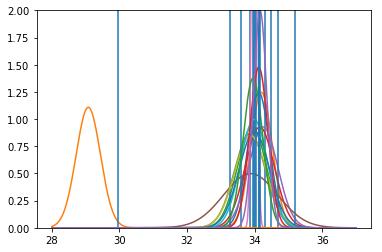

In [24]:
minm=28
maxm=37
mu=np.linspace(minm,maxm,1000)
for i,j in zip(df['Distance modulus'],df['Distance modulus error']):
    plt.plot(mu,stats.norm.pdf(mu,i,j))
plt.ylim(0,2)

(0, 2)

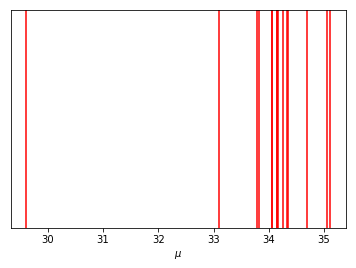

In [124]:
np.random.seed(0)
draws=[]
mu=np.linspace(minm,maxm,1000)
for i,j in zip(df['Distance modulus'],df['Distance modulus error']):
#    plt.plot(mu,stats.norm.pdf(mu,i,j))
    draws+=[np.random.normal(i,j)]
    plt.axvline(draws[-1],c='r')
draws=np.array(draws)
plt.yticks([])
plt.xlabel(r"$\mu$")
plt.ylim(0,2)

(0, 2)

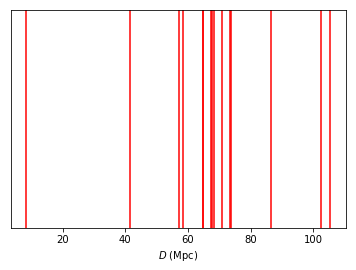

In [105]:
np.random.seed(0)
draws=[]
mu=np.linspace(minm,maxm,1000)
for i,j in zip(df['Distance modulus'],df['Distance modulus error']):
#    plt.plot(mu,stats.norm.pdf(mu,i,j))
    draws+=[1e-6*10**(1+np.random.normal(i,j)/5)]
    plt.axvline(draws[-1],c='r')
draws=np.array(draws)
plt.yticks([])
plt.xlabel(r"$D$ (Mpc)")
plt.ylim(0,2)

(0, 2)

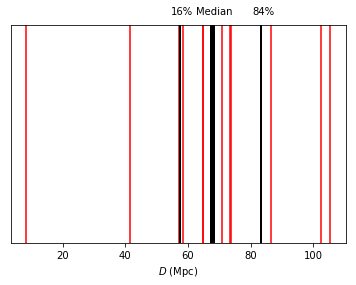

In [123]:
np.random.seed(0)
draws=[]
mu=np.linspace(minm,maxm,1000)
for i,j in zip(df['Distance modulus'],df['Distance modulus error']):
#    plt.plot(mu,stats.norm.pdf(mu,i,j))
    draws+=[1e-6*10**(1+np.random.normal(i,j)/5)]
    plt.axvline(draws[-1],c='r')
draws=np.array(draws)
plt.axvline(np.percentile(draws,16),c='k',lw=2)
plt.text(np.percentile(draws,16)-3,2.1,'16%')
plt.axvline(np.percentile(draws,50),c='k',lw=5)
plt.text(np.percentile(draws,50)-5,2.1,'Median')
plt.axvline(np.percentile(draws,84),c='k',lw=2)
plt.text(np.percentile(draws,84)-3,2.1,'84%')
plt.yticks([])
plt.xlabel(r"$D$ (Mpc)")
plt.ylim(0,2)


In [111]:
np.percentile(draws,16)-np.percentile(draws,50),np.percentile(draws,50)

(-10.144854091801449, 67.697160178465481)

In [110]:
np.percentile(draws,50)-np.percentile(draws,84)

-15.741863400303174

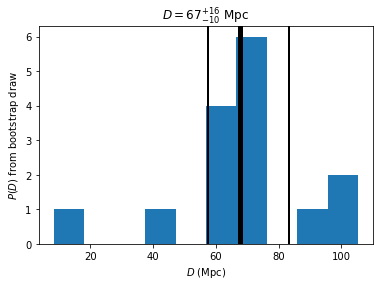

In [122]:
plt.hist(draws)
plt.axvline(np.percentile(draws,16),c='k',lw=2)
plt.axvline(np.percentile(draws,50),c='k',lw=5)
plt.axvline(np.percentile(draws,84),c='k',lw=2)
plt.xlabel(r"$D$ (Mpc)")
plt.ylabel("$P(D)$ from bootstrap draw")
#plt.ylim(0,2.5)
plt.title("$D=67_{-10}^{+16}$ Mpc")



In [26]:
draws

[34.191762818808634,
 33.971118680489276,
 34.36290153085782,
 34.59784747559712,
 34.263748309398785,
 34.43781277119007,
 34.01769027489913,
 34.117707074242205,
 33.1536598121513,
 33.21475560605508,
 34.15175316124934,
 29.098419222720914,
 33.53891408992265,
 33.841850352666974,
 34.19549479181681]